#**TITLE: COVID-19 LOCKDOWN AND VACCINATION:     ANALYSIS OF ITS EFFECT ON INDIAN STATES.**

In [ ]:
!git clone https://github.com/reeve-k-15/CVD19LockdownVaccination_Effects_Dataprj

In [ ]:
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

In [ ]:
#importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import geopandas as gpd
pd.set_option("display.max_rows", None, "display.max_columns", None)

# **OBJECTIVE 1**

# **Data visualisation of  deaths, death rate, recovery rate and total cases of each Indian States/UTs**

In [ ]:
#reading the files
dj=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Vacc and data.xlsx")
dr = pd.read_excel('/content/CVD19LockdownVaccination_Effects_Dataprj/Death rate.xlsx')
tc=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Total cases and discharged.xlsx")
d=pd.read_excel('/content/CVD19LockdownVaccination_Effects_Dataprj/Total Cases.xlsx')
dd=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Discharged.xlsx")
data_da = pd.read_excel('/content/CVD19LockdownVaccination_Effects_Dataprj/Active rate.xlsx')
da=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Active rate.xlsx")

In [ ]:
data_da.head()

,STATE/UTS,ACTIVE
0,Andaman And Nicobar,103
1,Andhra Pradesh,4042100
2,Arunachal Pradesh,823
3,Assam,3732104
4,Bihar,451


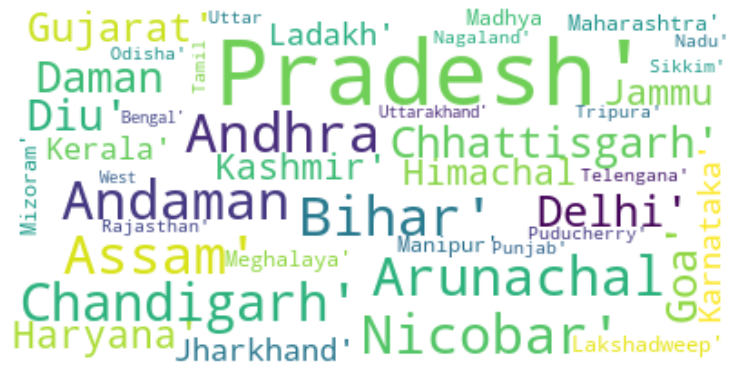

In [ ]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
text=list(d['STATE/UTS'])
plt.rcParams['figure.figsize']=(13,13)
worldcloud=WordCloud(max_font_size=50,max_words=400,background_color='white').generate(str(text))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
graph4 = px.bar(dj, x="STATE/UTS", y="Discharge Rate",title="Recovery Rate")
graph4.update_layout(title={'text' : "Recovery Rate",'y':0.95,'x':.5},
                          xaxis_title="State",yaxis_title="Rate",template="plotly_dark")
graph4.show()

In [ ]:
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)
map_df.head() #check the head of the file

In [ ]:
dj.rename(columns={'STATE/UTS': 'st_nm'},inplace=True)
merged5= map_df.merge(dj,on='st_nm', how = 'left')
merged5['Discharge Rate']= merged5['Discharge Rate'].replace(np.NaN,98)
merged5.head(5)

,id,st_nm,geometry,Active,Discharge,Death,Active Rate,Discharge Rate,Death Rate
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,NaN,NaN,98.00,NaN
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.0000,0.9934,0.0051,0.00,99.34,0.51
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",0.0061,0.9841,0.0098,0.61,98.41,0.98
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",0.0001,0.9866,0.0133,0.01,98.66,1.33
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",0.0005,0.9869,0.0125,0.05,98.69,1.25


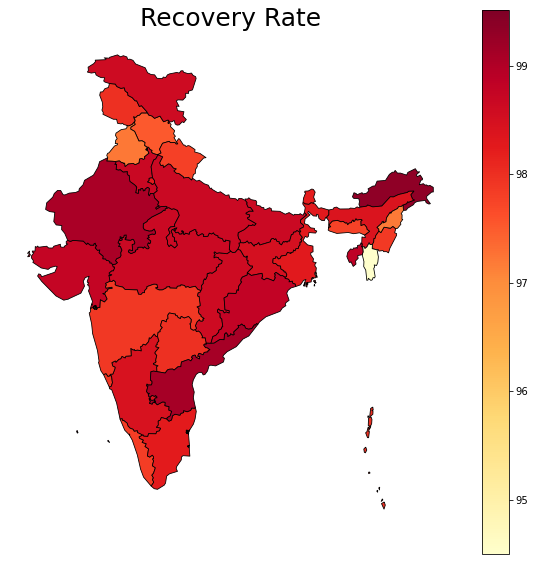

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Recovery Rate', fontdict={'fontsize': '25', 'fontweight' : '10'})
merged5.plot(column='Discharge Rate',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

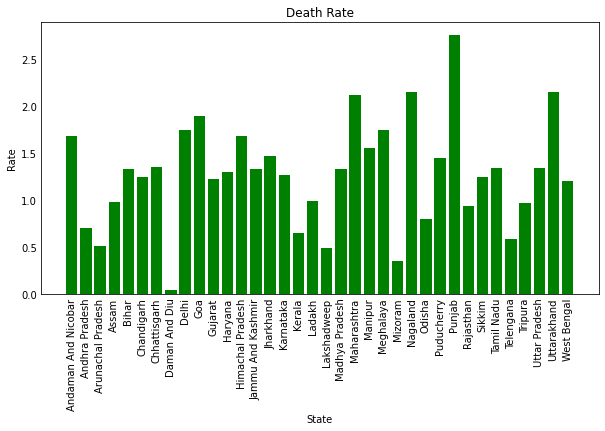

In [ ]:
#data visualisation of the death rate
X = list(dj.iloc[:, 0])
Y=list(dj.iloc[:,6])
plt.figure(figsize=(10,5))
plt.bar(X, Y,color='g')
plt.title("Death Rate")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Rate")
plt.tick_params(axis='both', length=0)

In [ ]:
dr.rename(columns={'STATE/UTS': 'st_nm'},inplace=True)
merged3= map_df.merge(dr,on='st_nm', how = 'left')
merged3['Death Rate']= merged3['Death Rate'].replace(np.NaN,1)

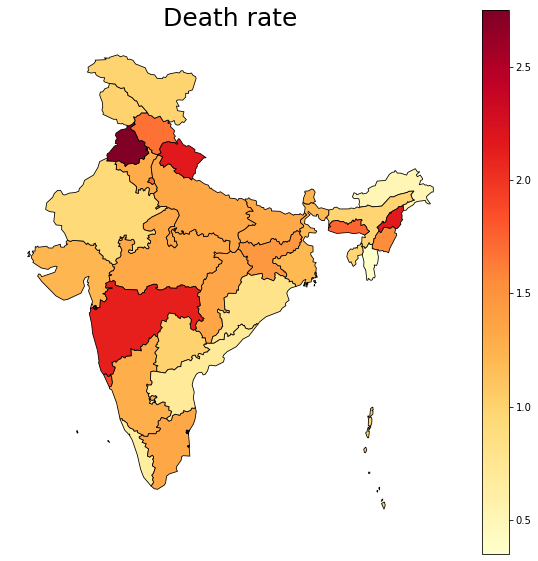

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Death rate', fontdict={'fontsize': '25', 'fontweight' : '10'})
merged3.plot(column='Death Rate',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

In [ ]:
sorted_active=da.sort_values(by="ACTIVE",ascending=False)
a=sorted_active.head(10)

In [ ]:
#Top 10 states with Total Cases
dt=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Total Cases.xlsx")
sorted_total=dt.sort_values(by="TOTAL CASES",ascending=False)
b=sorted_total.head(10)
import plotly.express as px
x=list(b['TOTAL CASES'])
y=list(b['STATE/UTS'])
fig = px.pie(values=x, names=y,title="Total Cases")
fig.show()

In [ ]:
tct = pd.read_excel('/content/CVD19LockdownVaccination_Effects_Dataprj/Total Cases.xlsx')
tct.rename(columns={'STATE/UTS': 'st_nm'},inplace=True)
merged6= map_df.merge(tct,on='st_nm', how = 'left')
merged6['TOTAL CASES']= merged6['TOTAL CASES'].replace(np.NaN, 100000)
#merged6.head(37)

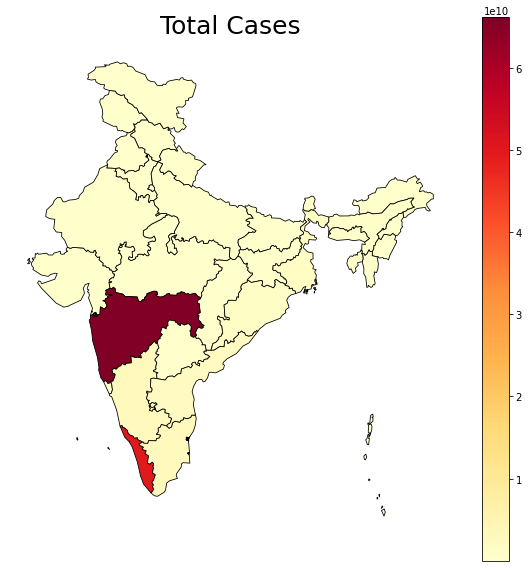

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Total Cases', fontdict={'fontsize': '25', 'fontweight' : '10'})
merged6.plot(column='TOTAL CASES',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

In [ ]:
#Top 10 states with death
sorted_total=tc.sort_values(by="Deaths",ascending=False)
c=sorted_total.head(10)
import plotly.express as px
x=list(c['Deaths'])
y=list(c['STATE/UTS'])
fig = px.pie(values=x, names=y,title="Deaths")
fig.show()

In [ ]:
data_df.rename(columns={'STATE/UTS': 'st_nm'},inplace=True)
merged1= map_df.merge(data_df,on='st_nm', how = 'left')
merged1['Deaths']= merged1['Deaths'].replace(np.NaN, 50)
#merged1.head(37)

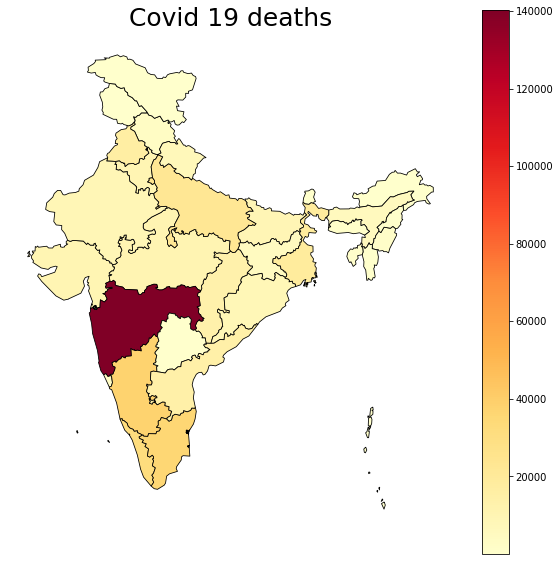

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Covid 19 deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})
merged1.plot(column='Deaths',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

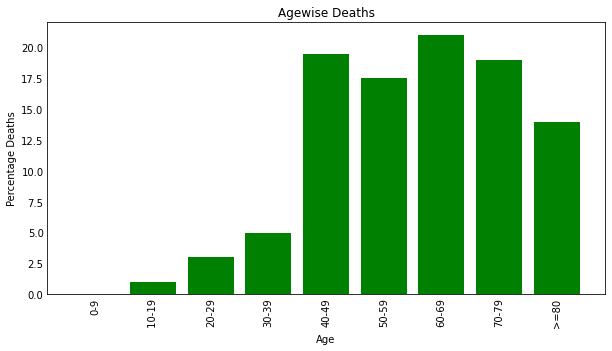

In [ ]:
#Agewise Death by percentage
ac=pd.read_csv("/content/CVD19LockdownVaccination_Effects_Dataprj/Agewise cases.csv")
X = list(ac.iloc[:, 1])
Y=list(ac.iloc[:,5])
plt.figure(figsize=(10,5))
plt.bar(X, Y,color='g')
plt.title("Agewise Deaths")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Percentage Deaths")
plt.tick_params(axis='both', length=0)

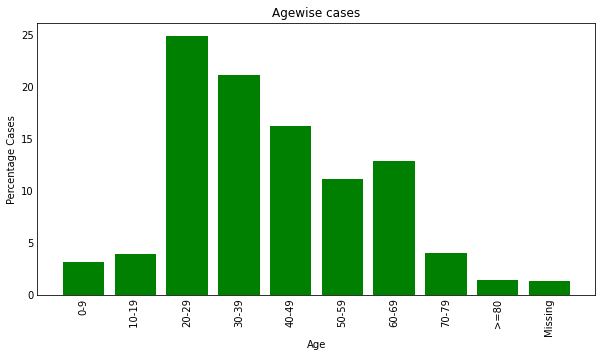

In [ ]:
#Agewise cases percentage
ac=pd.read_csv("/content/CVD19LockdownVaccination_Effects_Dataprj/Agewise cases.csv")
X = list(ac.iloc[:, 1])
Y=list(ac.iloc[:,4])
plt.figure(figsize=(10,5))
plt.bar(X, Y,color='g')
plt.title("Agewise cases")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Percentage Cases")
plt.tick_params(axis='both', length=0)

#**OBJECTIVE 2**

# **Data visualization of Covid-19 vaccinations.**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
df1=pd.read_csv("	http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv")
df1.head(3)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,16/01/2021,India,48276,3455,2957,48276,0,NaN,NaN,NaN,579,47697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0
1,17/01/2021,India,58604,8532,4954,58604,0,NaN,NaN,NaN,635,57969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0
2,18/01/2021,India,99449,13611,6583,99449,0,NaN,NaN,NaN,1299,98150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0


In [ ]:
df1.shape

(10693, 23)

In [ ]:
df2=df1[(df1['State']=='India')]
fig = px.line(df2, x = 'Updated On', y ='Total Doses Administered')
fig.update_layout(title={'text' : "Cumulative Vaccination Trend in INDIA",'y':0.95,'x':0.5},
                  xaxis_title="Date",yaxis_title="Daily Vaccinations",template="plotly_dark")
fig.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(name="Second Dose",x=df2['Updated On'], y=df2['Second Dose Administered']))
fig.add_trace(go.Scatter(name="First Dose",x=df2['Updated On'], y=df2['First Dose Administered']))
fig.update_layout(title={'text' : "1st Dose vs 2nd Dose Vaccination Trend in INDIA",'y':0.95,'x':0.5},
                  xaxis_title="Date",yaxis_title="Daily Vaccinations",template="plotly_dark")
fig.show()

In [ ]:
df3=df1[(df1['State']=='Maharashtra')]
fig = px.line(df3, x = 'Updated On', y ='Total Doses Administered')
fig.update_layout(title={'text' : "Cumulative Vaccination Trend in Maharashtra",'y':0.95,'x':0.5},
                          xaxis_title="Date",yaxis_title="Daily Vaccinations",template="plotly_dark")
fig.show()

In [ ]:
print(df2['Covaxin (Doses Administered)'].isnull().value_counts())
print(df2['CoviShield (Doses Administered)'].isnull().value_counts())
print(df2['Sputnik V (Doses Administered)'].isnull().value_counts())
df2['Sputnik V (Doses Administered)'] = df2['Sputnik V (Doses Administered)'] .fillna(0)
print(df2['Sputnik V (Doses Administered)'].isnull().value_counts())

In [ ]:
p=df2['Total Doses Administered'].copy()
for i in range(1,len(p)):
  p[i]=p[i]-df2['Total Doses Administered'][i-1]

d=df2['Covaxin (Doses Administered)'].copy()
for i in range(1,len(d)):
  d[i]=d[i]-df2['Covaxin (Doses Administered)'][i-1]

k=df2['CoviShield (Doses Administered)'].copy()
for i in range(1,len(k)):
  k[i]=k[i]-df2['CoviShield (Doses Administered)'][i-1]

t=df2['Sputnik V (Doses Administered)'].copy()
for i in range(1,len(t)):
  t[i]=t[i]-df2['Sputnik V (Doses Administered)'][i-1]

In [ ]:
df2['Daily rate of vaccination']=p
df2['Covaxin (Daily Doses Administered)']=d
df2['Covishield (Daily Doses Administered)']=k
df2['Sputnik V (Daily Doses Administered)']=t
df2['Daily rate of vaccination']=df2['Daily rate of vaccination'].abs()
df2['Covishield (Daily Doses Administered)']=df2['Covishield (Daily Doses Administered)'].abs()
df2['Covaxin (Daily Doses Administered)']=df2['Covaxin (Daily Doses Administered)'].abs()
df2['Sputnik V (Daily Doses Administered)']=df2['Sputnik V (Daily Doses Administered)'].abs()

In [ ]:
fig = px.line(df2, x = 'Updated On', y ='Daily rate of vaccination')
fig.update_layout(title={'text' : "Daily Vaccination Trend in India",'y':0.95,'x':0.5},
                          xaxis_title="Date",yaxis_title="Daily Vaccinations",template="plotly_dark")
fig.show()

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(name='Covishield',x=df2['Updated On'], y=df2['Covishield (Daily Doses Administered)']))
fig1.add_trace(go.Scatter(name='Covaxin',x=df2['Updated On'], y=df2['Covaxin (Daily Doses Administered)']))
fig1.add_trace(go.Scatter(name='Sputnik V',x=df2['Updated On'], y=df2['Sputnik V (Daily Doses Administered)']))
fig1.update_layout(title="COVISHIELD vs. COVAXIN vs. SPUTNIK V",title_x=0.5,yaxis_title="Vaccinations",template="plotly_dark")
fig1.show()

In [ ]:
print(df2['Male (Individuals Vaccinated)'].isnull().value_counts())
print(df2['Female (Individuals Vaccinated)'].isnull().value_counts())
print(df2['Transgender (Individuals Vaccinated)'].isnull().value_counts())
df2['Male (Individuals Vaccinated)'] = df2['Male (Individuals Vaccinated)'].fillna(0)
print(df2['Male (Individuals Vaccinated)'].isnull().value_counts())
df2['Female (Individuals Vaccinated)'] = df2['Female (Individuals Vaccinated)'].fillna(0)
print(df2['Female (Individuals Vaccinated)'].isnull().value_counts())
df2['Transgender (Individuals Vaccinated)'] = df2['Transgender (Individuals Vaccinated)'].fillna(0)
print(df2['Transgender (Individuals Vaccinated)'].isnull().value_counts())

False    160
True     129
Name: Male (Individuals Vaccinated), dtype: int64
False    160
True     129
Name: Female (Individuals Vaccinated), dtype: int64
False    160
True     129
Name: Transgender (Individuals Vaccinated), dtype: int64
False    289
Name: Male (Individuals Vaccinated), dtype: int64
False    289
Name: Female (Individuals Vaccinated), dtype: int64
False    289
Name: Transgender (Individuals Vaccinated), dtype: int64


In [ ]:
mll=df2['Male (Individuals Vaccinated)'].copy()
for i in range(1,len(mll)):
  mll[i]=mll[i]-df2['Male (Individuals Vaccinated)'][i-1]

fmll=df2['Female (Individuals Vaccinated)'].copy()
for i in range(1,len(fmll)):
  fmll[i]=fmll[i]-df2['Female (Individuals Vaccinated)'][i-1]

tl=df2['Transgender (Individuals Vaccinated)'].copy()
for i in range(1,len(tl)):
  tl[i]=tl[i]-df2['Transgender (Individuals Vaccinated)'][i-1]

In [ ]:
df2['Daily Male (Individuals Vaccinated)']=mll
df2['Daily Female (Individuals Vaccinated)']=fmll
df2['Daily Transgender (Individuals Vaccinated)']=tl
df2a=df2
indn= df2a[df2a['Total Doses Administered']>303426850 ].index
df2a.drop(indn , inplace=True)
df2a.tail(3)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),Daily rate of vaccination,Covaxin (Daily Doses Administered),Covishield (Daily Doses Administered),Sputnik V (Daily Doses Administered),Daily Male (Individuals Vaccinated),Daily Female (Individuals Vaccinated),Daily Transgender (Individuals Vaccinated)
157,22/06/2021,India,289961746,23436266,54639,238685516,51276230,NaN,NaN,NaN,34641890,255272448,47408.0,22406.0,NaN,NaN,NaN,83190167.0,88947171.0,66423283.0,128567271.0,110074369.0,43876.0,6069982,518512,5547345,4125.0,2863217.0,2532318.0,1174.0
158,23/06/2021,India,296892521,27105115,59462,244944880,51947641,NaN,NaN,NaN,35392947,261448717,50857.0,22436.0,NaN,NaN,NaN,88014595.0,89941914.0,66858838.0,131919150.0,112980429.0,45301.0,6930775,751057,6176269,3449.0,3351879.0,2906060.0,1425.0
159,24/06/2021,India,303426850,26458510,56282,250656880,52769970,NaN,NaN,NaN,36139047,267233899,53904.0,22588.0,NaN,NaN,NaN,92243148.0,90968877.0,67310981.0,134941971.0,115668447.0,46462.0,6534329,746100,5785182,3047.0,3022821.0,2688018.0,1161.0


In [ ]:
df2a['Daily Male (Individuals Vaccinated)']=df2a['Daily Male (Individuals Vaccinated)'].abs()
df2a['Daily Female (Individuals Vaccinated)']=df2a['Daily Female (Individuals Vaccinated)'].abs()
df2a['Daily Transgender (Individuals Vaccinated)']=df2a['Daily Transgender (Individuals Vaccinated)'].abs()

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(name='Males',x=df2a['Updated On'], y=df2a['Daily Male (Individuals Vaccinated)']))
fig1.add_trace(go.Scatter(name='Females',x=df2a['Updated On'], y=df2a['Daily Female (Individuals Vaccinated)']))
fig1.add_trace(go.Scatter(name='Transgenders',x=df2a['Updated On'], y=df2a['Daily Transgender (Individuals Vaccinated)']))
fig1.update_layout(title="Daily Rate of Vaccinations of Males vs. Females vs. Transgenders in India",title_x=0.5,
                   xaxis_title="Date",yaxis_title="Daily Vaccinations",template="plotly_dark")
fig1.show()

In [ ]:
print(df3['Male (Individuals Vaccinated)'].isnull().value_counts())
print(df3['Female (Individuals Vaccinated)'].isnull().value_counts())
print(df3['Transgender (Individuals Vaccinated)'].isnull().value_counts())
df3['Male (Individuals Vaccinated)'] = df3['Male (Individuals Vaccinated)'].fillna(0)
print(df3['Male (Individuals Vaccinated)'].isnull().value_counts())
df3['Female (Individuals Vaccinated)'] = df3['Female (Individuals Vaccinated)'].fillna(0)
print(df3['Female (Individuals Vaccinated)'].isnull().value_counts())
df3['Transgender (Individuals Vaccinated)'] = df3['Transgender (Individuals Vaccinated)'].fillna(0)
print(df3['Transgender (Individuals Vaccinated)'].isnull().value_counts())

False    160
True     129
Name: Male (Individuals Vaccinated), dtype: int64
False    160
True     129
Name: Female (Individuals Vaccinated), dtype: int64
False    160
True     129
Name: Transgender (Individuals Vaccinated), dtype: int64
False    289
Name: Male (Individuals Vaccinated), dtype: int64
False    289
Name: Female (Individuals Vaccinated), dtype: int64
False    289
Name: Transgender (Individuals Vaccinated), dtype: int64


In [ ]:
pmh=df3['Total Doses Administered'].copy()
for j in range(1,len(pmh)):
   pmh[6069+j] = pmh[6069+j] - df3['Total Doses Administered'][6068+j]

ml=df3['Male (Individuals Vaccinated)'].copy()
for j in range(1,len(ml)):
   ml[6069+j] = ml[6069+j] - df3['Male (Individuals Vaccinated)'][6068+j]

fml=df3['Female (Individuals Vaccinated)'].copy()
for j in range(1,len(fml)):
   fml[6069+j] = fml[6069+j] - df3['Female (Individuals Vaccinated)'][6068+j]
   
tg=df3['Transgender (Individuals Vaccinated)'].copy()
for j in range(1,len(tg)):
   tg[6069+j] = tg[6069+j] - df3['Transgender (Individuals Vaccinated)'][6068+j]

In [ ]:
df3['Daily rate of Vaccination'] = pmh
df3['Daily Male (Individuals Vaccinated)'] = ml
df3['Daily Female (Individuals Vaccinated)'] = fml
df3['Daily Transgender (Individuals Vaccinated)'] = tg
df3['Daily rate of Vaccination']=df3['Daily rate of Vaccination'].abs()
df3['Daily Male (Individuals Vaccinated)']=df3['Daily Male (Individuals Vaccinated)'].abs()
df3['Daily Female (Individuals Vaccinated)']=df3['Daily Female (Individuals Vaccinated)'].abs()
df3['Daily Transgender (Individuals Vaccinated)']=df3['Daily Transgender (Individuals Vaccinated)'].abs()
#df3.head(3)

In [ ]:
fig = px.line(df3, x = 'Updated On', y ='Daily rate of Vaccination')
fig.update_layout(title={'text' : "Daily Vaccination Trend in Maharashtra",'y':0.95,'x':0.5},
                        xaxis_title="Date",yaxis_title="Daily Vaccinations",template="plotly_dark")
fig.show()

In [ ]:
df333=df3[['Updated On','Daily Male (Individuals Vaccinated)',
           'Daily Female (Individuals Vaccinated)','Daily Transgender (Individuals Vaccinated)']]
df333 = df333.replace(0.0, np.nan)
df333 = df333.dropna()
df333.drop(df333.tail(1).index,inplace=True)
df333.head(3)

,Updated On,Daily Male (Individuals Vaccinated),Daily Female (Individuals Vaccinated),Daily Transgender (Individuals Vaccinated)
6069,16/01/2021,3668.0,2057.0,1.0
6070,17/01/2021,285.0,509.0,1.0
6071,18/01/2021,384.0,15.0,1.0


In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(name='Males',x=df333['Updated On'], y=df333['Daily Male (Individuals Vaccinated)']))
fig1.add_trace(go.Scatter(name='Females',x=df333['Updated On'], y=df333['Daily Female (Individuals Vaccinated)']))
fig1.add_trace(go.Scatter(name='Transgenders',x=df333['Updated On'], y=df333['Daily Transgender (Individuals Vaccinated)']))
fig1.update_layout(title="Daily Rate of Vaccinations of Males vs. Females vs. Transgenders in Maharashtra",title_x=0.5,
                   xaxis_title="Date",yaxis_title="Daily Vaccinations",template="plotly_dark")
fig1.show()

#**OBJECTIVE 3**

# **To exhibit the effects of lockdown on Air Pollution and its  forecasting**

In [ ]:
#Forcasting AQI for the first 15 days of June 2020
delhi=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Delhi AQI.xlsx")
l=[]
for j in range(0,15):
    a=57.84228+(0.78426*delhi.iloc[j,2])+(0.45427*(delhi.iloc[j,3]))+(1.29675*delhi.iloc[j,4])-(38.82181*delhi.iloc[j,5])-(0.95653*delhi.iloc[j,6])
    l.append(a)
l

[105.7240542,
 122.76354389999999,
 135.5097576,
 161.4071912,
 118.5162193,
 107.46211629999999,
 115.2321225,
 123.41910960000004,
 164.0687187,
 166.03187690000001,
 154.3765823,
 162.87893090000003,
 143.6617555,
 162.2288494,
 138.10866910000001]

In [ ]:
#Bar plot comparing actual and forcasted values
X=list(delhi.iloc[:, 1])
y1=list(delhi.iloc[:, 8])
y2=l
fig = go.Figure(data=[go.Bar(name='Actual', x=X, y=y1),go.Bar(name='Predicted', x=X, y=y2)])
fig.update_layout(title={'text' : "Comparing Delhi AQI actual vs forecasted values",'y':0.95,'x':0.5},
                  xaxis_title="Dates",yaxis_title="AQI",barmode='group',template="plotly_dark")
fig.show()

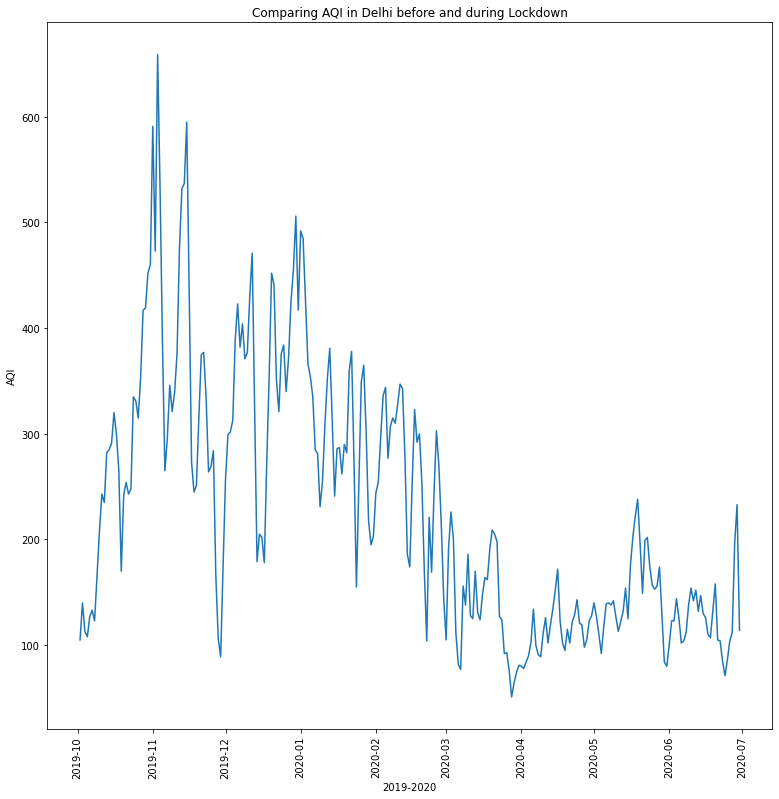

In [ ]:
dff=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Delhi AQI Trimmed.xlsx")
X = list(dff.iloc[:, 1])
Y=list(dff.iloc[:,8])
plt.plot(X, Y)
plt.xlabel('2019-2020')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.title('Comparing AQI in Delhi before and during Lockdown')
plt.show()

In [ ]:
#Forcasting AQI for the first 15 days of June 2020
mumbai=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Mumbai AQI.xlsx")
m=[]
for j in range(0,15):
    a=34.34114+(1.32298*mumbai.iloc[j,2])+(0.15443*(mumbai.iloc[j,3]))-(0.10975*mumbai.iloc[j,4])+(9.8395*mumbai.iloc[j,5])+(0.10035*mumbai.iloc[j,7])
    m.append(a)
m

[68.3669432,
 75.32245640000002,
 52.0629704,
 72.2316765,
 57.9286131,
 54.49719400000001,
 57.572513300000004,
 53.867526999999995,
 54.1444348,
 57.121013299999994,
 54.08643040000001,
 56.64886820000001,
 55.814375299999995,
 54.6078712,
 55.9441471]

In [ ]:
#Bar plot comparing actual and forcasted values
X=list(mumbai.iloc[:, 1])
y1=list(mumbai.iloc[:, 8])
y2=m
fig = go.Figure(data=[go.Bar(name='Actual', x=X, y=y1),go.Bar(name='Predicted', x=X, y=y2)])
fig.update_layout(title={'text' : "Comparing Mumbai AQI actual vs forecasted values",'y':0.95,'x':0.5},
                  xaxis_title="Dates",yaxis_title="AQI",barmode='group',template="plotly_dark")
fig.show()

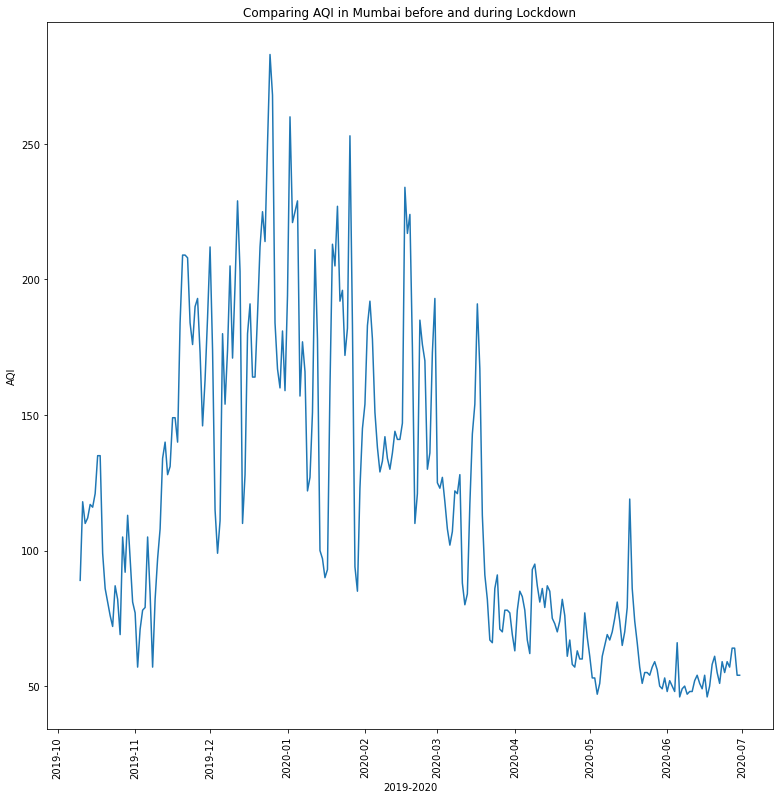

In [ ]:
dff=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Mumbai AQI Trimmed.xlsx")
X = list(dff.iloc[:, 1])
Y=list(dff.iloc[:,8])
plt.plot(X, Y)
plt.xlabel('2019-2020')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.title('Comparing AQI in Mumbai before and during Lockdown')
plt.show()

In [ ]:
#Forcasting AQI for the first 15 days of June 2020
banglore=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Banglore AQI.xlsx")
n=[]
for j in range(0,15):
    a=18.40936+(0.64610*banglore.iloc[j,2])+(0.21170*(banglore.iloc[j,3]))+(0.1608*banglore.iloc[j,4])+(19.67635*banglore.iloc[j,5])-(1.38407*banglore.iloc[j,6])+(0.47434*banglore.iloc[j,7])
    n.append(a)
n

[42.94586579999999,
 40.168124399999996,
 41.968452299999996,
 44.6873454,
 58.72138939999999,
 54.0538856,
 49.9195542,
 55.5217009,
 56.4935599,
 63.7166946,
 49.4957192,
 48.9757954,
 51.95895470000001,
 46.665591400000004,
 50.1530052]

In [ ]:
#Bar plot comparing actual and forcasted values
X=list(banglore.iloc[:, 1])
y1=list(banglore.iloc[:, 8])
y2=n
fig = go.Figure(data=[go.Bar(name='Actual', x=X, y=y1),go.Bar(name='Predicted', x=X, y=y2)])
fig.update_layout(title={'text' : "Comparing Banglore AQI actual vs forecasted values",'y':0.95,'x':0.5},
                  xaxis_title="Dates",yaxis_title="AQI",barmode='group',template="plotly_dark")
fig.show()

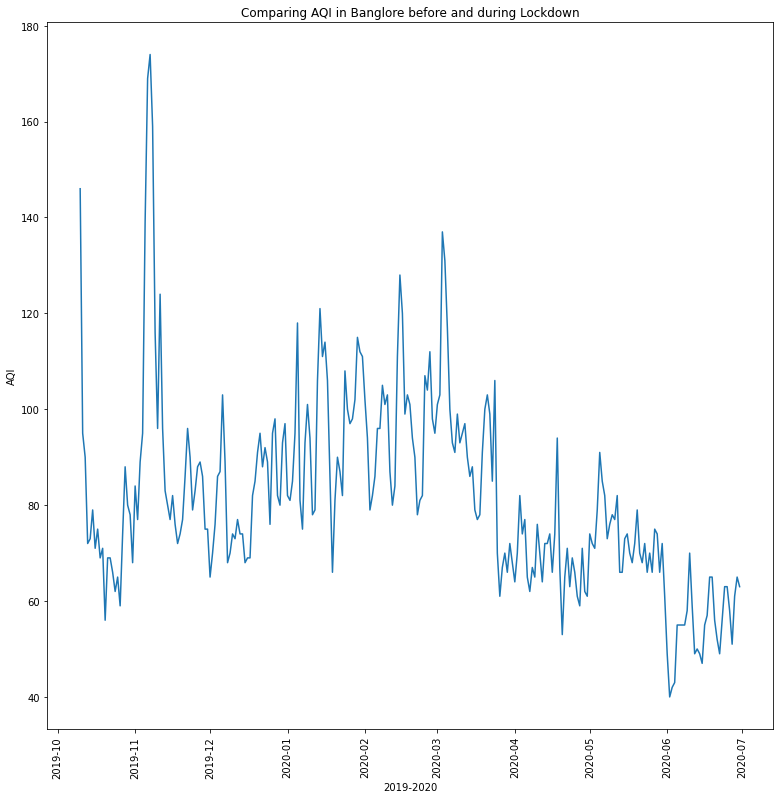

In [ ]:
dff=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Banglore AQI Trimmed.xlsx")
X = list(dff.iloc[:, 1])
Y=list(dff.iloc[:,8])
plt.plot(X, Y)
plt.xlabel('2019-2020')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.title('Comparing AQI in Banglore before and during Lockdown')
plt.show()

In [ ]:
#Forcasting AQI for the first 15 days of June 2020
chennai=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Chennai AQI.xlsx")
o=[]
for j in range(0,15):
    a=-6.8923+(1.20998*chennai.iloc[j,2])+(31.81632*(chennai.iloc[j,5]))+(0.76761*chennai.iloc[j,7])
    o.append(a)
o

[111.7137227,
 91.0866579,
 95.63773520000001,
 95.4626886,
 92.50372920000001,
 120.2141727,
 98.5852817,
 93.7783379,
 93.42427800000002,
 88.1479478,
 99.2295131,
 198.1918269,
 89.82419809999999,
 90.5910073,
 93.1122006]

In [ ]:
#Bar plot comparing actual and forcasted values
X=list(chennai.iloc[:, 1])
y1=list(chennai.iloc[:, 8])
y2=o
fig = go.Figure(data=[go.Bar(name='Actual', x=X, y=y1),go.Bar(name='Predicted', x=X, y=y2)])
fig.update_layout(title={'text' : "Comparing Chennai AQI actual vs forecasted values",'y':0.95,'x':0.5},
                  xaxis_title="Dates",yaxis_title="AQI",barmode='group',template="plotly_dark")
fig.show()

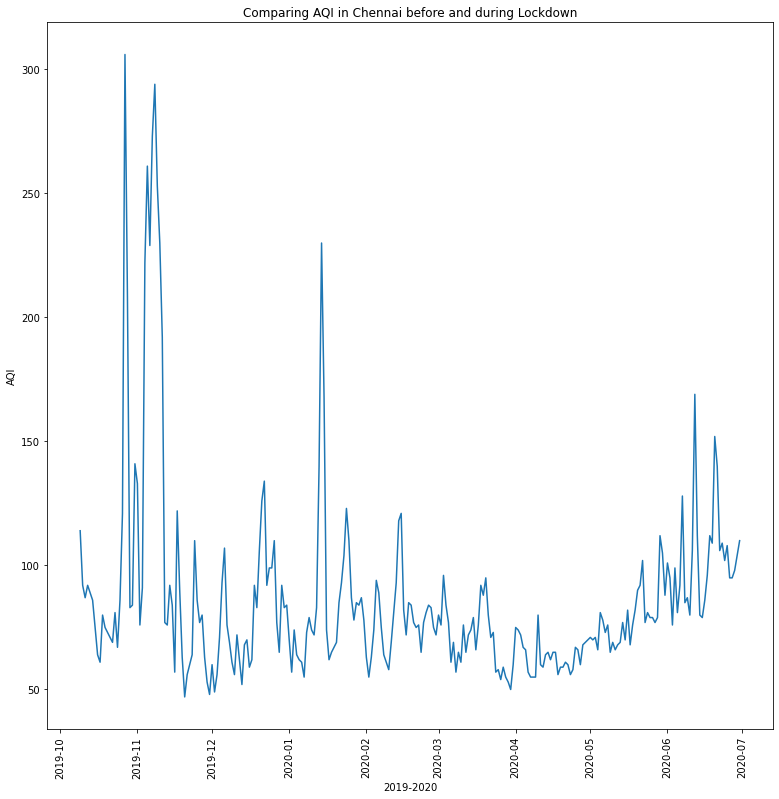

In [ ]:
dff=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Chennai AQI Trimmed.xlsx")
X = list(dff.iloc[:, 1])
Y=list(dff.iloc[:,8])
plt.plot(X, Y)
plt.xlabel('2019-2020')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.title('Comparing AQI in Chennai before and during Lockdown')
plt.show()

In [ ]:
#Forcasting AQI for the first 15 days of June 2020
kolkata=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Kolkata AQI.xlsx")
p=[]
for j in range(0,15):
    a=-3.9169+(0.59387*kolkata.iloc[j,1])+(0.55559*(kolkata.iloc[j,2]))+(0.31304*kolkata.iloc[j,3])+(11.6081*kolkata.iloc[j,4])+(0.49768*kolkata.iloc[j,5])+(0.45126*kolkata.iloc[j,6])
    p.append(a)
p

[45.020008600000004,
 48.786730999999996,
 54.0335424,
 48.4882057,
 41.6577922,
 59.251163000000005,
 66.58891739999999,
 62.3993104,
 59.055686900000005,
 43.4794717,
 30.234059200000004,
 33.6293955,
 34.9791954,
 33.2624604,
 39.623192200000005]

In [ ]:
#Bar plot comparing actual and forcasted values
X=list(kolkata.iloc[:, 0])
y1=list(kolkata.iloc[:, 7])
y2=p
fig = go.Figure(data=[go.Bar(name='Actual', x=X, y=y1),go.Bar(name='Predicted', x=X, y=y2)])
fig.update_layout(title={'text' : "Comparing Kolkata AQI actual vs forecasted values",'y':0.95,'x':0.5},
                  yaxis_title="AQI",xaxis_title="Dates",barmode='group',template="plotly_dark")
fig.show()

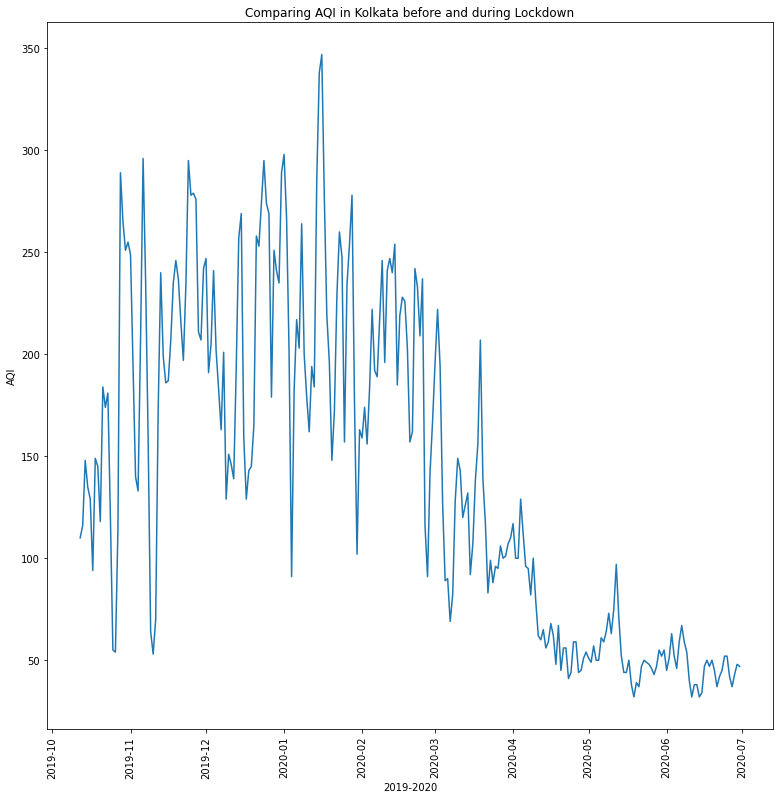

In [ ]:
dff=pd.read_excel("/content/CVD19LockdownVaccination_Effects_Dataprj/Kolkata AQI Trimmed.xlsx")
X = list(dff.iloc[:, 0])
Y=list(dff.iloc[:,7])
plt.plot(X, Y)
plt.xlabel('2019-2020')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.title('Comparing AQI in Kolkata before and during Lockdown')
plt.show()

#**OBJECTIVE 4** 
#**To determine whether a higher vaccination rate was needed to decrease the rate of positive cases**

In [ ]:
df14=pd.read_csv("http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv")
df44=df14[df14['State']=='India']
df44['Total Doses Administered'].isnull().value_counts()

False    289
Name: Total Doses Administered, dtype: int64

In [ ]:
h=df44['Total Doses Administered'].copy()
for i in range(1,len(h)):
  h[i]=h[i]-df44['Total Doses Administered'][i-1]
df44['Daily rate of vaccination']=h
df44['Daily rate of vaccination']=df44['Daily rate of vaccination'].abs()
df44a=df44[['Updated On','State','Daily rate of vaccination']]
df44a.head()

,Updated On,State,Daily rate of vaccination
0,16/01/2021,India,48276
1,17/01/2021,India,10328
2,18/01/2021,India,40845
3,19/01/2021,India,96076
4,20/01/2021,India,55755


In [ ]:
df45= pd.read_csv('	https://api.covid19india.org/csv/latest/states.csv')
df441=df45[['Date','State','Confirmed']]
indn= df441[ df441['Date'] < '2021-01-16' ].index
df441.drop(indn , inplace=True)
df44b=df441[df441['State']=='India']
df44b.reset_index()
df44b.head()

,Date,State,Confirmed
11016,2021-01-16,India,10558715
11052,2021-01-17,India,10572677
11089,2021-01-18,India,10582664
11126,2021-01-19,India,10596451
11163,2021-01-20,India,10611730


In [ ]:
df44alpha = pd.concat([df44a,df44b.reset_index()],axis=1)
df44c=df44alpha.drop(['index','Date','State'],axis=1)
df44c.tail()

,Updated On,Daily rate of vaccination,Confirmed
284,27/10/2021,5136403,34231243
285,28/10/2021,7677641,34245550
286,29/10/2021,6165777,34259765
287,30/10/2021,7080343,34272705
288,31/10/2021,1718874,34285612


In [ ]:
s=df44c['Confirmed'].copy()
for i in range(1,len(s)):
  s[i]=s[i]-df44c['Confirmed'][i-1]
df44c['Daily Positive cases']=s
df44cc=df44c.drop(['Confirmed'],axis=1)
df44cc.at[0,'Daily Positive cases']=15050
df44cc.head()

,Updated On,Daily rate of vaccination,Daily Positive cases
0,16/01/2021,48276,15050
1,17/01/2021,10328,13962
2,18/01/2021,40845,9987
3,19/01/2021,96076,13787
4,20/01/2021,55755,15279


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='Vaccinations',x=df44cc['Updated On'], y=df44cc['Daily rate of vaccination']))
fig.add_trace(go.Scatter(name='Positive cases',x=df44cc['Updated On'], y=df44cc['Daily Positive cases']))
fig.update_layout(title={'text' : "Daily Vaccinationrate vs. Daily Covid Positivity rate",'y':0.95,'x':0.5},
                          xaxis_title="Date",template="plotly_dark")
fig.show()

In [ ]:
fig = px.line(df44cc, x = 'Updated On', y ='Daily Positive cases')
fig.update_layout( title={'text' : "Daily Positive cases trend in India",'y':0.95,'x':0.5},
                   xaxis_title="Date",yaxis_title="Positive cases",template="plotly_dark")
fig.show()

#**OBJECTIVE 5** 
#**To compare the trends of covid death rate before and after vaccination**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import datetime
warnings.filterwarnings("ignore")
np.random.seed(32)

In [ ]:
df5= pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
dfs=list(df5.groupby("State"))
#dfs

In [ ]:
df5['Date']=pd.to_datetime(df5['Date'])
dfs=list(df5.groupby("State"))
first_title = dfs[0][0]+' '*30 +'1 here represents :2399 Deaths'
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible=[False]*len(dfs)
    visible[i]=True
    name=d[0]
    scale=MinMaxScaler()
    yp=scale.fit_transform(d[1][['Deceased']])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=d[1]['Date'],y=[i[0] for i in yp]))
    mm=max(d[1]['Deceased'])
    traces.append(
    fig.update_traces(visible=True if i==0 else False).data[0])
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title": str(name)+' '*30+'1 here represents :'+str(mm) +' Deaths'}]))

updatemenus = [{'active':0, "buttons":buttons}]
shapes=[({'type': 'line',
               'xref': 'x',
               'yref': 'y',
               'x0': '2021-08-13' ,
               'y0': 0,
               'x1': '2021-08-13',
               'y1': 1})]
fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus,shapes=shapes,template='plotly_dark'))
fig.update_layout(title=first_title, title_x=0.5,xaxis_title="Dates",yaxis_title="Deaths")
fig.show()

#**OBJECTIVE 6** 
#**To predict the rise and fall of cases using various methods**

In [ ]:
#using growth factor method
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k =df1[df1['Country/Region']=='India'].loc[:,'2/4/20':]
india_confirmed = k.values.tolist()[0] 

growth_diff = []

for i in range(1,len(india_confirmed)):
    growth_diff.append(india_confirmed[i] / india_confirmed[i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.0303849535632703


In [ ]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

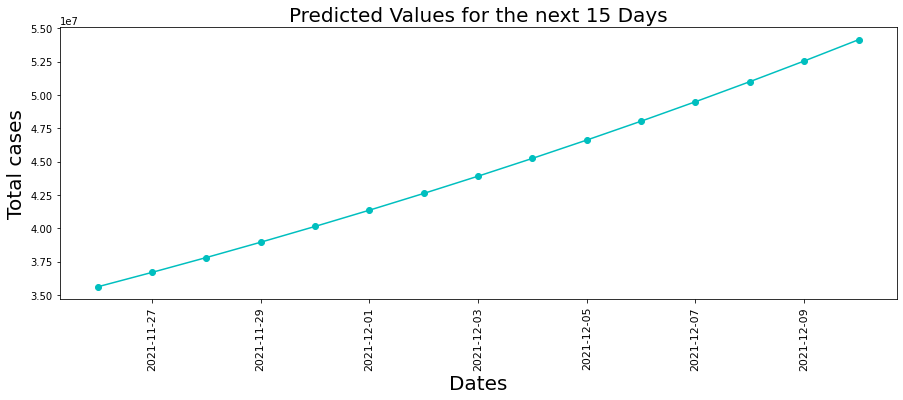

In [ ]:
prediction_dates = []

start_date = dates_india[len(dates_india) - 1]
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = global_confirmed[5][len(dates_india) - 1]
predicted_cases = []

for i in range(15):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,5))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')

In [ ]:
k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


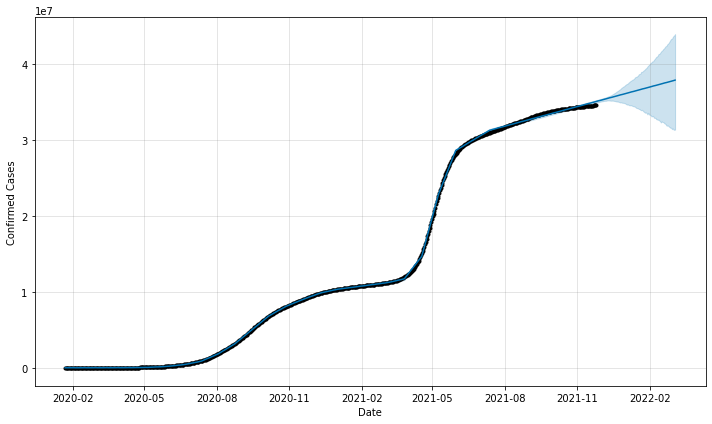

In [ ]:
k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=100)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='Confirmed Cases')

In [ ]:
#using prophet model
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df1.tail()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21
191,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404
192,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479
193,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9575,9596,9635,9650,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981
194,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,209549,209571,209589,209610,209629,209634,209639,209648,209657,209672,209702,209722,209734,209739,209760,209781,209815,209852,209869,209902,209908,209918,209939,209953,209963,209971,209983,209996,210008,210020,210036,210043,210057,210070,210073,210090,210099,210112,210118,210138
195,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132405,132437,132540,132588,132588,132651,132688,132724,132808,132880,132926,132926,132977,133007,133047,133091,133112,133112,133168,133187,133205,133242,133302,133329,133329,133393,133428,133438,133505,133557,133593,133593,133615,133647,133674,133674,133747,133774,133836,133836


In [ ]:
#coverting the dates to a list
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
#Convert the data into a suitable form for the Prediction model
k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

In [ ]:
data.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
data.tail()

,ds,y
670,2021-11-22,34526480
671,2021-11-23,34535763
672,2021-11-24,34544882
673,2021-11-25,34555431
674,2021-11-26,34563749


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data["ds"],data["y"],test_size=0.1,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(608,)
(608,)
(68,)
(68,)


In [ ]:
train=data.iloc[:608,:]
train

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
603,2021-09-16,33381728
604,2021-09-17,33417390
605,2021-09-18,33448163
606,2021-09-19,33478419


In [ ]:
test=data.iloc[608:,:]
test

,ds,y
608,2021-09-21,33531498
609,2021-09-22,33563421
610,2021-09-23,33594803
611,2021-09-24,33624419
612,2021-09-25,33652745
...,...,...
671,2021-11-23,34535763
672,2021-11-24,34544882
673,2021-11-25,34555431
674,2021-11-26,34563749


In [ ]:
m=Prophet(interval_width=0.85)
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
fut=m.make_future_dataframe(periods=68)
fut.tail()

,ds
671,2021-11-23
672,2021-11-24
673,2021-11-25
674,2021-11-26
675,2021-11-27


In [ ]:
forcast=m.predict(fut)
forcast[['ds','yhat']].tail()

,ds,yhat
671,2021-11-23,3.734414e+07
672,2021-11-24,3.739637e+07
673,2021-11-25,3.744683e+07
674,2021-11-26,3.749666e+07
675,2021-11-27,3.755189e+07


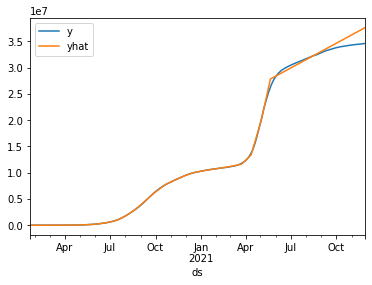

In [ ]:
 pd.concat([data.set_index('ds')['y'],forcast.set_index('ds')['yhat']],axis=1).plot()

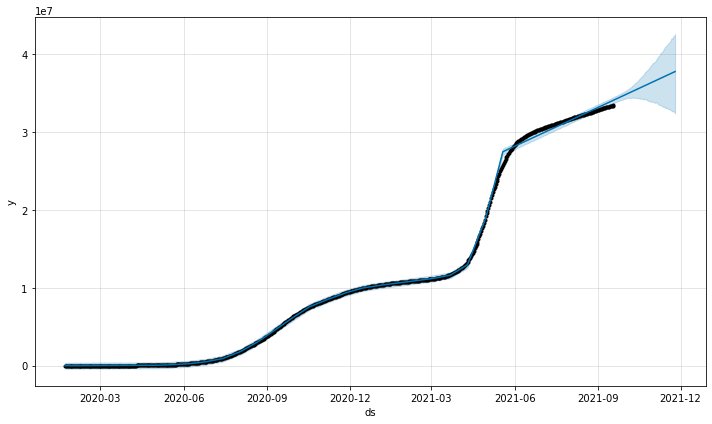

In [ ]:
fig=m.plot(forcast)

In [ ]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
669,2021-11-21,3.758318e+07,3.276824e+07,4.208005e+07,3.273000e+07,4.193073e+07,8124.696757,8124.696757,8124.696757,8124.696757,8124.696757,8124.696757,0.0,0.0,0.0,3.759131e+07
670,2021-11-22,3.763743e+07,3.268147e+07,4.197748e+07,3.270015e+07,4.209453e+07,-1300.272522,-1300.272522,-1300.272522,-1300.272522,-1300.272522,-1300.272522,0.0,0.0,0.0,3.763613e+07
671,2021-11-23,3.769167e+07,3.268563e+07,4.233723e+07,3.267604e+07,4.225872e+07,-5359.836957,-5359.836957,-5359.836957,-5359.836957,-5359.836957,-5359.836957,0.0,0.0,0.0,3.768631e+07
672,2021-11-24,3.774591e+07,3.264081e+07,4.236310e+07,3.266842e+07,4.246011e+07,-5265.187115,-5265.187115,-5265.187115,-5265.187115,-5265.187115,-5265.187115,0.0,0.0,0.0,3.774064e+07
673,2021-11-25,3.780015e+07,3.241377e+07,4.260975e+07,3.256896e+07,4.261053e+07,-1543.328403,-1543.328403,-1543.328403,-1543.328403,-1543.328403,-1543.328403,0.0,0.0,0.0,3.779861e+07


In [ ]:
from scipy.stats import pearsonr
forcast1=forcast.iloc[608:,:]            
pred=forcast1['yhat']
pear=pearsonr(test['y'],pred)[0]
pear

0.9892845466398179

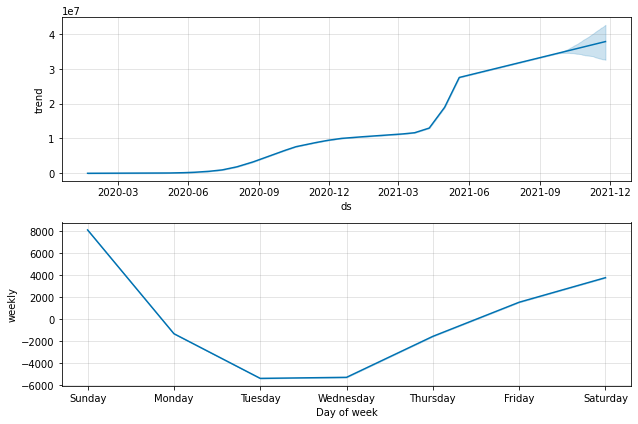

In [ ]:
fig2=m.plot_components(forcast)